In [71]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy import stats

In [19]:
# Load Dataset
df = pd.read_csv('E-commerce Customer Behavior - Sheet1.csv')

In [7]:
#  First Look
print(df.head())
print(df.info())

   Customer ID  Gender  Age           City Membership Type  Total Spend  \
0          101  Female   29       New York            Gold      1120.20   
1          102    Male   34    Los Angeles          Silver       780.50   
2          103  Female   43        Chicago          Bronze       510.75   
3          104    Male   30  San Francisco            Gold      1480.30   
4          105    Male   27          Miami          Silver       720.40   

   Items Purchased  Average Rating  Discount Applied  \
0               14             4.6              True   
1               11             4.1             False   
2                9             3.4              True   
3               19             4.7             False   
4               13             4.0              True   

   Days Since Last Purchase Satisfaction Level  
0                        25          Satisfied  
1                        18            Neutral  
2                        42        Unsatisfied  
3               

In [21]:
#Data Cleaning and preprocessing

#Check for Missing Values
print("Missing values in dataset:\n", df.isnull().sum())

# Drop rows with missing Satisfaction Level (only 2 missing)
df = df.dropna(subset=["Satisfaction Level"])

# Handle Duplicates
print("\n Number of duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()

# Standardize Column Names (optional for consistency)
df.columns = df.columns.str.strip().str.replace(" ", "_")
print("\n Cleaned Column Names:", df.columns.tolist())
#Check for Missing Values again
print("Missing values in dataset:\n", df.isnull().sum())

Missing values in dataset:
 Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

 Number of duplicate rows: 0

 Cleaned Column Names: ['Customer_ID', 'Gender', 'Age', 'City', 'Membership_Type', 'Total_Spend', 'Items_Purchased', 'Average_Rating', 'Discount_Applied', 'Days_Since_Last_Purchase', 'Satisfaction_Level']
Missing values in dataset:
 Customer_ID                 0
Gender                      0
Age                         0
City                        0
Membership_Type             0
Total_Spend                 0
Items_Purchased             0
Average_Rating              0
Discount_Applied            0
Days_Since_Last_Purchase    0
Satisfaction_Level          0
dtype: int64


In [27]:
# Create Age Groups
bins = [20, 30, 40, 50]
labels = ["20-29", "30-39", "40-49"]
df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)
df["Age_Group"]

0      20-29
1      30-39
2      40-49
3      30-39
4      20-29
       ...  
345    30-39
346    30-39
347    30-39
348    30-39
349    40-49
Name: Age_Group, Length: 348, dtype: category
Categories (3, object): ['20-29' < '30-39' < '40-49']

In [29]:
# Encode Categorical Variables
#convert Gender, Membership Type into numeric codes
df["Gender_Code"] = df["Gender"].map({"Male": 0, "Female": 1})
df["Membership_Code"] = df["Membership_Type"].map({"Bronze": 0, "Silver": 1, "Gold": 2})
df["Satisfaction_Code"] = df["Satisfaction_Level"].map({"Unsatisfied": 0, "Neutral": 1, "Satisfied": 2})


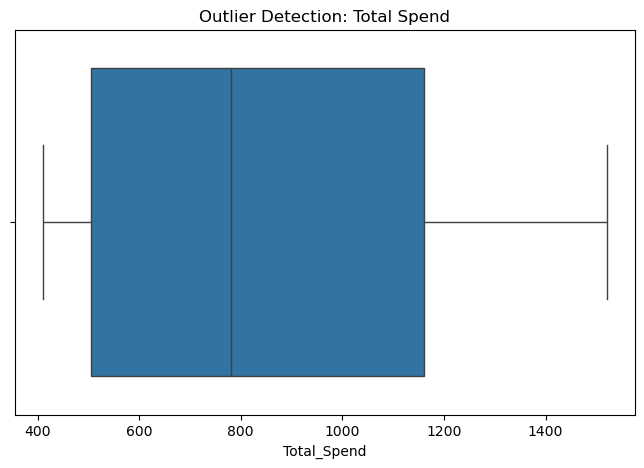

In [35]:
# Outlier Detection (Boxplot method for Total Spend)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x=df["Total_Spend"])
plt.title("Outlier Detection: Total Spend")
plt.show()

# Extreme outliers using IQR method
Q1 = df["Total_Spend"].quantile(0.25)
Q3 = df["Total_Spend"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR


In [33]:
df["Total_Spend_Clean"] = df["Total_Spend"].clip(lower, upper)
print("\n Preprocessing Completed. Shape of cleaned dataset:", df.shape)


 Preprocessing Completed. Shape of cleaned dataset: (348, 16)


In [ ]:
#Descriptive Statistics

In [37]:
# Summary stats (mean, median, std, etc.)
desc_stats = df[["Age", "Total_Spend", "Items_Purchased", 
                 "Average_Rating", "Days_Since_Last_Purchase"]].describe()

print(" Descriptive Statistics:\n", desc_stats)

# Variance
variance = df[["Age", "Total_Spend", "Items_Purchased", 
               "Average_Rating", "Days_Since_Last_Purchase"]].var()

print("\n Variance:\n", variance)

# Median separately (since describe() gives only mean)
medians = df[["Age", "Total_Spend", "Items_Purchased", 
              "Average_Rating", "Days_Since_Last_Purchase"]].median()

print("\n Median Values:\n", medians)

 Descriptive Statistics:
               Age  Total_Spend  Items_Purchased  Average_Rating  \
count  348.000000   348.000000       348.000000      348.000000   
mean    33.577586   847.793103        12.632184        4.023563   
std      4.878024   361.692375         4.146079        0.579145   
min     26.000000   410.800000         7.000000        3.000000   
25%     30.000000   505.750000         9.000000        3.500000   
50%     32.000000   780.200000        12.000000        4.100000   
75%     37.000000  1160.600000        15.000000        4.500000   
max     43.000000  1520.100000        21.000000        4.900000   

       Days_Since_Last_Purchase  
count                348.000000  
mean                  26.614943  
std                   13.474750  
min                    9.000000  
25%                   15.000000  
50%                   23.000000  
75%                   38.000000  
max                   63.000000  

 Variance:
 Age                             23.795116
Total_Spe

In [ ]:
# Frequency Tables

In [39]:
print("\n Gender Counts:\n", df["Gender"].value_counts())
print("\n Membership Type Counts:\n", df["Membership_Type"].value_counts())
print("\n Satisfaction Level Counts:\n", df["Satisfaction_Level"].value_counts())


 Gender Counts:
 Gender
Male      175
Female    173
Name: count, dtype: int64

 Membership Type Counts:
 Membership_Type
Gold      117
Silver    117
Bronze    114
Name: count, dtype: int64

 Satisfaction Level Counts:
 Satisfaction_Level
Satisfied      125
Unsatisfied    116
Neutral        107
Name: count, dtype: int64


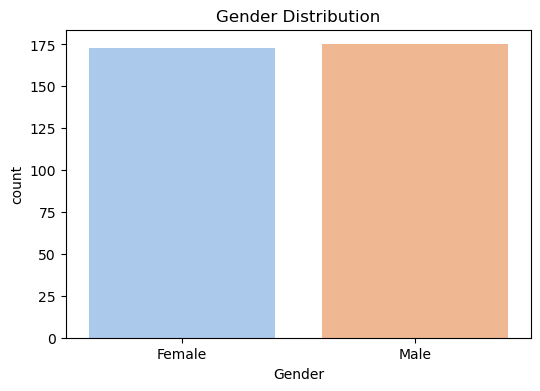

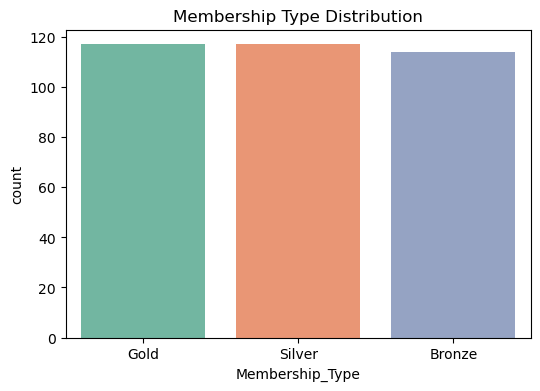

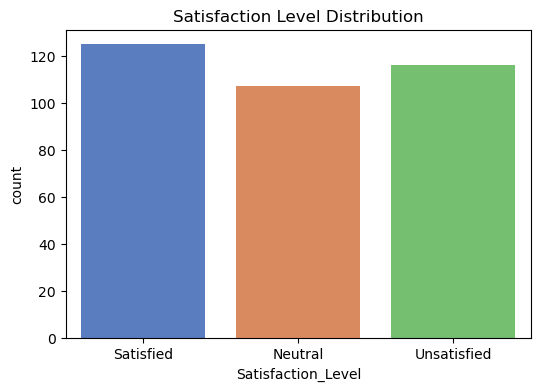

In [51]:
#Visualization
# Bar plot - Gender
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", data=df,hue='Gender', palette="pastel")
plt.title("Gender Distribution")
plt.show()

# Bar plot - Membership
plt.figure(figsize=(6,4))
sns.countplot(x="Membership_Type", data=df,hue='Membership_Type', palette="Set2")
plt.title("Membership Type Distribution")
plt.show()

# Bar plot - Satisfaction Level
plt.figure(figsize=(6,4))
sns.countplot(x="Satisfaction_Level", data=df,hue='Satisfaction_Level', palette="muted")
plt.title("Satisfaction Level Distribution")
plt.show()

In [ ]:
#  Contingency Tables

In [43]:
# Gender vs Membership
gender_membership_ct = pd.crosstab(df["Gender"], df["Membership_Type"])
print("\n Gender vs Membership Type:\n", gender_membership_ct)

# Membership vs Satisfaction
membership_satisfaction_ct = pd.crosstab(df["Membership_Type"], df["Satisfaction_Level"])
print("\n Membership Type vs Satisfaction Level:\n", membership_satisfaction_ct)

# Age group vs Membership
bins = [20, 30, 40, 50]
labels = ["20-29", "30-39", "40-49"]
df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

age_membership_ct = pd.crosstab(df["Age_Group"], df["Membership_Type"])
print("\n Age Group vs Membership Type:\n", age_membership_ct)



 Gender vs Membership Type:
 Membership_Type  Bronze  Gold  Silver
Gender                               
Female              114    58       1
Male                  0    59     116

 Membership Type vs Satisfaction Level:
 Satisfaction_Level  Neutral  Satisfied  Unsatisfied
Membership_Type                                    
Bronze                   56          0           58
Gold                      0        117            0
Silver                   51          8           58

 Age Group vs Membership Type:
 Membership_Type  Bronze  Gold  Silver
Age_Group                            
20-29                 0    34      35
30-39                56    83      82
40-49                58     0       0


Hypothesis Testing

t-test
If p-value < 0.05 → there is a significant difference in spending.
If p-value ≥ 0.05 → no significant difference; spending is statistically similar.

In [61]:
# Two-sample t-test: Discount vs No Discount
discount_spend = df[df["Discount_Applied"] == True]["Total_Spend"]
no_discount_spend = df[df["Discount_Applied"] == False]["Total_Spend"]

t_stat, p_value = ttest_ind(discount_spend, no_discount_spend, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject H₀: Spending differs between customers with and without discount.")
else:
    print("Fail to Reject H₀: No significant difference in spending between groups.")


t-statistic: -3.1733967424316
p-value: 0.0016626987862602422
Reject H₀: Spending differs between customers with and without discount.


Decision: Reject H₀ → There is a significant difference in spending between customers who used a discount and those who didn’t.

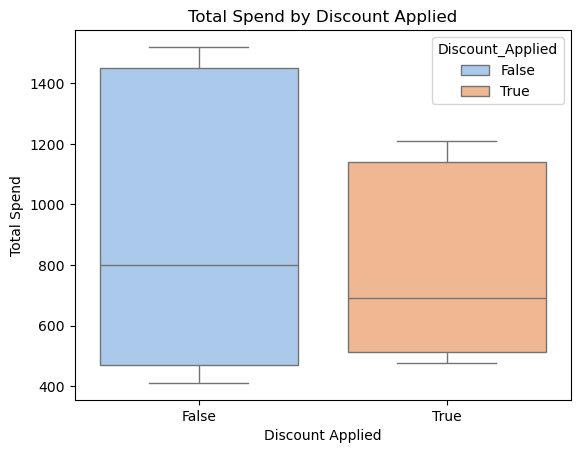

In [69]:
# Visualization
sns.boxplot(x="Discount_Applied", y="Total_Spend", data=df,hue="Discount_Applied", palette="pastel")

plt.title("Total Spend by Discount Applied")
plt.xlabel("Discount Applied")
plt.ylabel("Total Spend")
plt.show()

In [79]:
# Hypothesis testing on different membership type
#Gold vs Silver
gold_spend = df[df["Membership_Type"] == "Gold"]["Total_Spend"]
silver_spend = df[df["Membership_Type"] == "Silver"]["Total_Spend"]

# Perform two-sample t-test
t_stat, p_val = stats.ttest_ind(gold_spend, silver_spend, equal_var=False)

print("Gold vs Silver")
print("T-statistic:", t_stat)
print("P-value:", p_val)

Gold vs Silver
T-statistic: 37.21188272775685
P-value: 2.9767260215257946e-78


Decision: Reject H₀ → There is a significant difference in spending between Gold and Silver members.

In [83]:
#Gold vs Bronze
bronze_spend = df[df["Membership_Type"] == "Bronze"]["Total_Spend"]
# Perform two-sample t-test
t_stat2, p_val2 = stats.ttest_ind(gold_spend, bronze_spend, equal_var=False)

print("\nGold vs Bronze")
print("T-statistic:", t_stat2)
print("P-value:", p_val2)



Gold vs Bronze
T-statistic: 58.35749995134096
P-value: 5.557437146997534e-93


Decision: Reject H₀ → There is a significant difference in spending between Gold and Bronze members.

#Visualization

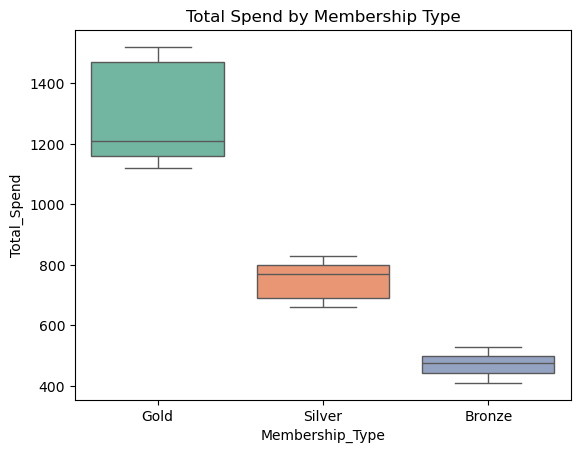

In [89]:
sns.boxplot(x="Membership_Type", y="Total_Spend", data=df,hue='Membership_Type', palette="Set2")
plt.title("Total Spend by Membership Type")
plt.show()


In [ ]:
#Chi2 test

1. Gender vs Membership Type

Hypothesis:

H₀: Gender and Membership Type are independent (no association).
H₁: Gender and Membership Type are not independent (there is an association).

Membership_Type  Bronze  Gold  Silver
Gender                               
Female              114    58       1
Male                  0    59     116
Chi2: 227.03873975735252, p-value: 5.002234792240524e-50


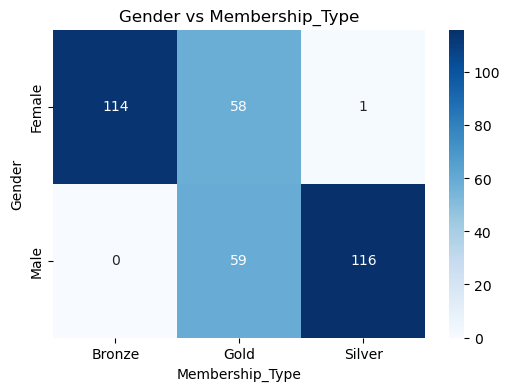

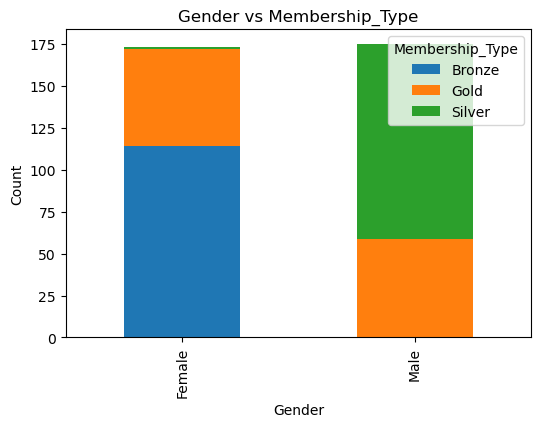

In [115]:
# Contingency table
contingency1 = pd.crosstab(df['Gender'], df['Membership_Type'])
print(contingency1)

# Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency1)
print(f"Chi2: {chi2}, p-value: {p}")


Decision: Reject H₀ → There is a strong association between Gender and Membership Type.

2. Age Group vs Satisfaction Level

In [107]:
# Create age groups
df['Age Group'] = pd.cut(df['Age'], bins=[18,25,35,50,70], 
                         labels=['18-25','26-35','36-50','51-70'])

# Contingency table
contingency2 = pd.crosstab(df['Age Group'], df['Satisfaction_Level'])
print(contingency2)

# Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency2)
print(f"Chi2: {chi2}, p-value: {p}")


Satisfaction_Level  Neutral  Satisfied  Unsatisfied
Age Group                                          
26-35                    52        124           58
36-50                    55          1           58
Chi2: 90.49750380264105, p-value: 2.2321158751479904e-20


Decision: Reject H₀ → There is a significant association between Age Group and Satisfaction Level.

3. Membership Type vs Discount Applied

In [111]:
contingency3 = pd.crosstab(df['Membership_Type'], df['Discount_Applied'])
print(contingency3)

chi2, p, dof, expected = stats.chi2_contingency(contingency3)
print(f"Chi2: {chi2}, p-value: {p}")


Discount_Applied  False  True 
Membership_Type               
Bronze               56     58
Gold                 58     59
Silver               59     58
Chi2: 0.040688827448790696, p-value: 0.9798611375603427


Decision: Fail to Reject H₀ → There is no significant association between Membership Type and Discount Applied.

Visualization

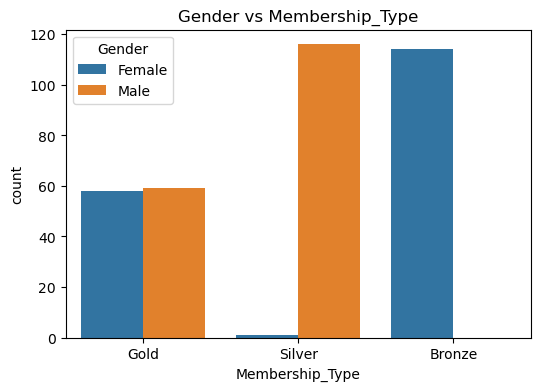

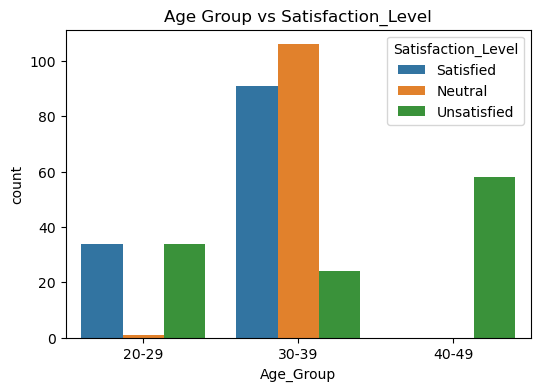

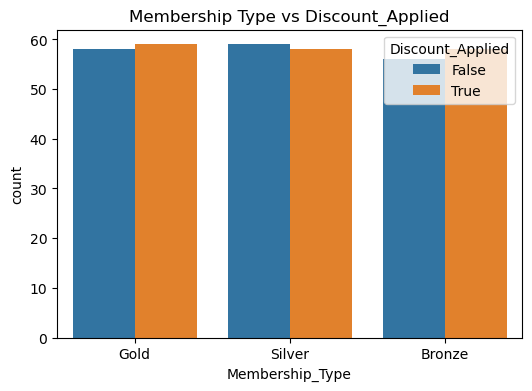

In [119]:
# Gender vs Membership Type
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Membership_Type", hue="Gender")
plt.title("Gender vs Membership_Type")
plt.show()

# Age Group vs Satisfaction Level
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Age_Group", hue="Satisfaction_Level")
plt.title("Age Group vs Satisfaction_Level")
plt.show()

# Membership Type vs Discount Applied
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Membership_Type", hue="Discount_Applied")
plt.title("Membership Type vs Discount_Applied")
plt.show()


ANOVA TEST
ANOVA is used when we want to test whether the means of more than two groups are significantly different.

In [125]:
# Group data based on Membership Type
gold = df[df['Membership_Type'] == 'Gold']['Total_Spend']
silver = df[df['Membership_Type'] == 'Silver']['Total_Spend']
bronze = df[df['Membership_Type'] == 'Bronze']['Total_Spend']

# Perform One-way ANOVA
f_stat, p_val = stats.f_oneway(gold, silver, bronze)

print("ANOVA F-statistic:", f_stat)
print("ANOVA p-value:", p_val)

# Interpretation
if p_val < 0.05:
    print("Significant difference: At least one membership type has a different average spend.")
else:
    print("No significant difference: Membership types spend similarly on average.")


ANOVA F-statistic: 2265.8053117129307
ANOVA p-value: 3.744768965836192e-199
Significant difference: At least one membership type has a different average spend.


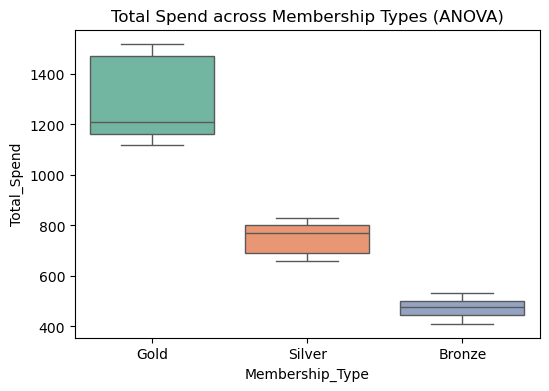

In [131]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Membership_Type", y="Total_Spend",hue='Membership_Type',palette="Set2")
plt.title("Total Spend across Membership Types (ANOVA)")
plt.show()


H₀: All age groups have the same average satisfaction level.
H₁: At least one age group’s average satisfaction level is different.
Decision: If p-value < 0.05, reject H₀ → conclude that satisfaction varies by age group.

Decision: Reject H₀ → At least one membership type has a significantly different average spend.